<a href="https://colab.research.google.com/github/debora28/pi-2020.2/blob/main/07_12_Crime_E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium

In [252]:
# Diretamente do GitHub (dataset 2014):
url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/2014-1-10mil.csv'
data = pd.read_csv(url)

In [253]:
# (dataset 2014 antigo):
# url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/2014-1-100mil.csv'
# data = pd.read_csv(url)

In [254]:
# data.to_csv('2014-1-100mil.csv', index= True)

In [255]:
print(data.isnull().sum())
print(data)

NUM_BO                       0
ANO_BO                       0
ID_DELEGACIA                 0
NOME_DEPARTAMENTO            0
NOME_SECCIONAL               0
DELEGACIA                    0
NOME_DEPARTAMENTO_CIRC       0
NOME_SECCIONAL_CIRC          0
NOME_DELEGACIA_CIRC          0
ANO                          0
MES                          0
DATA_OCORRENCIA_BO          87
HORA_OCORRENCIA_BO        1040
FLAG_STATUS                  0
RUBRICA                      0
DESDOBRAMENTO             9351
CONDUTA                   4835
LATITUDE                  1164
LONGITUDE                 1164
CIDADE                       0
LOGRADOURO                   0
NUMERO_LOGRADOURO           55
FLAG_STATUS.1                0
DESCR_TIPO_PESSOA            0
CONT_PESSOA                  0
SEXO_PESSOA                  0
IDADE_PESSOA              1902
COR                       2372
DESCR_PROFISSAO           2995
DESCR_GRAU_INSTRUCAO      2832
dtype: int64
      NUM_BO  ANO_BO  ...   DESCR_PROFISSAO DESCR_GRAU_IN

In [256]:
data.shape

(10000, 30)

In [257]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_BO                  10000 non-null  int64  
 1   ANO_BO                  10000 non-null  int64  
 2   ID_DELEGACIA            10000 non-null  int64  
 3   NOME_DEPARTAMENTO       10000 non-null  object 
 4   NOME_SECCIONAL          10000 non-null  object 
 5   DELEGACIA               10000 non-null  object 
 6   NOME_DEPARTAMENTO_CIRC  10000 non-null  object 
 7   NOME_SECCIONAL_CIRC     10000 non-null  object 
 8   NOME_DELEGACIA_CIRC     10000 non-null  object 
 9   ANO                     10000 non-null  int64  
 10  MES                     10000 non-null  int64  
 11  DATA_OCORRENCIA_BO      9913 non-null   object 
 12  HORA_OCORRENCIA_BO      8960 non-null   object 
 13  FLAG_STATUS             10000 non-null  object 
 14  RUBRICA                 10000 non-null 

In [258]:
data2 = data.drop('DESDOBRAMENTO', axis=1)
data2.to_csv('data_semDesdob.csv', index= False)
data2.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
0,1,2014,10363,DECAP,DEL.SEC.2 SUL,83 D.P. PARQUE BRISTOL,DECAP,DEL.SEC.2 SUL,83 D.P. PARQUE BRISTOL,2014,1,02/01/2014,06:30,C,Roubo (art. 157),VEICULO,-23.65760046,-46.61717673,S.PAULO,AV MIGUEL STEFANO,9999,C,Autor,2,M,NaN,Preta,NaN,NaN
1,1,2014,10373,DECAP,DEL.SEC.6 SANTO AMARO,100 D.P. JDIM HERCULANO,DECAP,DEL.SEC.6 SANTO AMARO,100 D.P. JDIM HERCULANO,2014,1,02/01/2014,NaN,C,Roubo (art. 157),TRANSEUNTE,-23.68989209,-46.77386022,S.PAULO,EST DO M BOI MIRIM,5000,C,Vitima,1,F,39.0,Branca,NaN,NaN
2,1,2014,20200,DECAP,DEL.SEC.5 LESTE,DEL.SEC.5 LESTE,DECAP,DEL.SEC.1 CENTRO,12 D.P. PARI,2014,2,22/02/2014,NaN,C,Furto (art. 155),OUTROS,-23.52095371,-46.6253548,S.PAULO,PONTE CRUZEIRO DO SUL,1100,C,Vitima,1,M,52.0,Parda,AJUDANTE GERAL,1 Grau completo
3,1,2014,30105,DEMACRO,DEL.SEC.SANTO ANDRE,04 D.P. SANTO ANDRE,DEMACRO,DEL.SEC.SANTO ANDRE,06 D.P. SANTO ANDRE,2014,1,01/01/2014,01:00,C,Furto (art. 155),VEICULO,-23.69004592,-46.51597554,S.ANDRE,AV AUREA,785,C,Curador,14,F,60.0,NaN,APOSENTADO(A),NaN
4,1,2014,30105,DEMACRO,DEL.SEC.SANTO ANDRE,04 D.P. SANTO ANDRE,DEMACRO,DEL.SEC.SANTO ANDRE,06 D.P. SANTO ANDRE,2014,1,01/01/2014,01:00,C,Furto (art. 155),VEICULO,-23.69004592,-46.51597554,S.ANDRE,AV AUREA,785,C,Indiciado,3,M,26.0,Parda,DESEMPREGADO(A),2 Grau completo


In [259]:
data2['CONDUTA'].value_counts()

VEICULO                         1386
TRANSEUNTE                      1369
OUTROS                           681
RESIDENCIA                       422
INTERIOR DE VEICULO              354
ESTABELECIMENTO COMERCIAL        326
CARGA                            273
INTERIOR ESTABELECIMENTO         112
ESTABELECIMENTO BANCARIO          75
ESTABELECIMENTO-OUTROS            62
INTERIOR TRANSPORTE COLETIVO      46
ESTABELECIMENTO ENSINO            37
COLETIVO                          13
CONDOMINIO RESIDENCIAL             7
CONDOMINIO COMERCIAL               2
Name: CONDUTA, dtype: int64

In [260]:
data2['CONDUTA'].fillna('VEICULO', inplace=True)

In [261]:
data2['CONDUTA'].value_counts()

VEICULO                         6221
TRANSEUNTE                      1369
OUTROS                           681
RESIDENCIA                       422
INTERIOR DE VEICULO              354
ESTABELECIMENTO COMERCIAL        326
CARGA                            273
INTERIOR ESTABELECIMENTO         112
ESTABELECIMENTO BANCARIO          75
ESTABELECIMENTO-OUTROS            62
INTERIOR TRANSPORTE COLETIVO      46
ESTABELECIMENTO ENSINO            37
COLETIVO                          13
CONDOMINIO RESIDENCIAL             7
CONDOMINIO COMERCIAL               2
Name: CONDUTA, dtype: int64

In [262]:
data2['LATITUDE'].value_counts()

Informacao restrita (art. 31 da LAI)    429
-23.71286115                             48
-23.52519435                             23
-23.64027263                             23
-23.55850851                             22
                                       ... 
-23.54925271                              1
-23.68805937                              1
-23.54138412                              1
-23.4355466                               1
-23.55358709                              1
Name: LATITUDE, Length: 3440, dtype: int64

In [263]:
data2['LATITUDE'].fillna('-23.71286115', inplace=True)

In [264]:
data2['LATITUDE'].replace('Informacao restrita (art. 31 da LAI)', '-23.71286115')

0       -23.65760046
1       -23.68989209
2       -23.52095371
3       -23.69004592
4       -23.69004592
            ...     
9995    -23.59282471
9996    -23.68735677
9997     -23.7704097
9998    -23.58106758
9999     -23.6138048
Name: LATITUDE, Length: 10000, dtype: object

In [265]:
data2['LATITUDE'].replace('NULL', '-23.71286115')

0       -23.65760046
1       -23.68989209
2       -23.52095371
3       -23.69004592
4       -23.69004592
            ...     
9995    -23.59282471
9996    -23.68735677
9997     -23.7704097
9998    -23.58106758
9999     -23.6138048
Name: LATITUDE, Length: 10000, dtype: object

In [266]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_BO                  10000 non-null  int64  
 1   ANO_BO                  10000 non-null  int64  
 2   ID_DELEGACIA            10000 non-null  int64  
 3   NOME_DEPARTAMENTO       10000 non-null  object 
 4   NOME_SECCIONAL          10000 non-null  object 
 5   DELEGACIA               10000 non-null  object 
 6   NOME_DEPARTAMENTO_CIRC  10000 non-null  object 
 7   NOME_SECCIONAL_CIRC     10000 non-null  object 
 8   NOME_DELEGACIA_CIRC     10000 non-null  object 
 9   ANO                     10000 non-null  int64  
 10  MES                     10000 non-null  int64  
 11  DATA_OCORRENCIA_BO      9913 non-null   object 
 12  HORA_OCORRENCIA_BO      8960 non-null   object 
 13  FLAG_STATUS             10000 non-null  object 
 14  RUBRICA                 10000 non-null 

In [267]:
data2['LONGITUDE'].value_counts()

Informacao restrita (art. 31 da LAI)    429
-46.78186771                             48
-46.39605905                             23
-46.81568811                             23
-46.72128418                             22
                                       ... 
-46.51308004                              1
-46.4396255                               1
-46.51269345                              1
-46.93463658                              1
-46.45599307                              1
Name: LONGITUDE, Length: 3440, dtype: int64

In [268]:
data2['LONGITUDE'].fillna('-46.78186771', inplace=True)

In [269]:
data2['LONGITUDE'].replace('Informacao restrita (art. 31 da LAI)', '-46.78186771')

0       -46.61717673
1       -46.77386022
2        -46.6253548
3       -46.51597554
4       -46.51597554
            ...     
9995    -46.80662548
9996    -46.66987176
9997    -46.72372479
9998    -46.75421897
9999    -46.53028157
Name: LONGITUDE, Length: 10000, dtype: object

In [270]:
data2['LONGITUDE'].replace('NULL', '-46.78186771')

0       -46.61717673
1       -46.77386022
2        -46.6253548
3       -46.51597554
4       -46.51597554
            ...     
9995    -46.80662548
9996    -46.66987176
9997    -46.72372479
9998    -46.75421897
9999    -46.53028157
Name: LONGITUDE, Length: 10000, dtype: object

In [271]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_BO                  10000 non-null  int64  
 1   ANO_BO                  10000 non-null  int64  
 2   ID_DELEGACIA            10000 non-null  int64  
 3   NOME_DEPARTAMENTO       10000 non-null  object 
 4   NOME_SECCIONAL          10000 non-null  object 
 5   DELEGACIA               10000 non-null  object 
 6   NOME_DEPARTAMENTO_CIRC  10000 non-null  object 
 7   NOME_SECCIONAL_CIRC     10000 non-null  object 
 8   NOME_DELEGACIA_CIRC     10000 non-null  object 
 9   ANO                     10000 non-null  int64  
 10  MES                     10000 non-null  int64  
 11  DATA_OCORRENCIA_BO      9913 non-null   object 
 12  HORA_OCORRENCIA_BO      8960 non-null   object 
 13  FLAG_STATUS             10000 non-null  object 
 14  RUBRICA                 10000 non-null 

In [272]:
data2['DATA_OCORRENCIA_BO'].value_counts()

01/01/2014    2556
02/01/2014    1443
03/01/2014     911
06/01/2014     550
04/01/2014     415
              ... 
09/06/2014       1
03/05/2014       1
22/03/2014       1
25/06/2014       1
04/05/2014       1
Name: DATA_OCORRENCIA_BO, Length: 155, dtype: int64

In [273]:
data2['DATA_OCORRENCIA_BO'].fillna('01/01/2014', inplace=True)

In [274]:
data2['HORA_OCORRENCIA_BO'].value_counts()

12:00    239
15:00    218
16:00    207
14:00    204
01:00    201
        ... 
02:07      1
16:55      1
12:26      1
12:19      1
18:29      1
Name: HORA_OCORRENCIA_BO, Length: 484, dtype: int64

In [275]:
data2['HORA_OCORRENCIA_BO'].fillna('12:00', inplace=True)

In [276]:
data2['NUMERO_LOGRADOURO'].value_counts()

0                                       1983
Informacao restrita (art. 31 da LAI)     429
1                                        402
100                                      245
200                                      132
                                        ... 
2875                                       1
6391                                       1
7596                                       1
492                                        1
3073                                       1
Name: NUMERO_LOGRADOURO, Length: 1059, dtype: int64

In [277]:
data2['NUMERO_LOGRADOURO'].fillna('12:00', inplace=True)

In [278]:
data2['COR'].value_counts()

Branca     4166
Parda      2517
Preta       575
Outros      334
Amarela      36
Name: COR, dtype: int64

In [279]:
data2['COR'].fillna('12:00', inplace=True)

In [280]:
data2['DESCR_GRAU_INSTRUCAO'].value_counts()

2 Grau completo        2780
1 Grau completo        1882
Superior completo      1310
1 Grau incompleto       574
Superior incompleto     321
2 Grau incompleto       227
Analfabeto               74
Name: DESCR_GRAU_INSTRUCAO, dtype: int64

In [281]:
data2['DESCR_GRAU_INSTRUCAO'].fillna('12:00', inplace=True)

In [282]:
data2['IDADE_PESSOA'].value_counts()

30.0    269
26.0    260
33.0    256
28.0    245
38.0    241
       ... 
89.0      1
81.0      1
90.0      1
88.0      1
87.0      1
Name: IDADE_PESSOA, Length: 92, dtype: int64

In [283]:
data2['IDADE_PESSOA'].fillna('12:00', inplace=True)

In [284]:
data2['DESCR_PROFISSAO'].value_counts()

POLICIAL MILITAR              827
POLICIAL CIVIL                721
ESTUDANTE                     308
MOTORISTA                     300
DESEMPREGADO                  281
                             ... 
LAVADOR(A) DE CARRO             1
ENCARREGADO DE OBRAS            1
SERVENTUARIO(A) DA JUSTICA      1
TECNICO EM ELETRICIDADE         1
ENTREGADOR DE PIZZA             1
Name: DESCR_PROFISSAO, Length: 418, dtype: int64

In [285]:
data2['DESCR_PROFISSAO'].fillna('12:00', inplace=True)

In [286]:
print(data2.isnull().any())
print()

NUM_BO                    False
ANO_BO                    False
ID_DELEGACIA              False
NOME_DEPARTAMENTO         False
NOME_SECCIONAL            False
DELEGACIA                 False
NOME_DEPARTAMENTO_CIRC    False
NOME_SECCIONAL_CIRC       False
NOME_DELEGACIA_CIRC       False
ANO                       False
MES                       False
DATA_OCORRENCIA_BO        False
HORA_OCORRENCIA_BO        False
FLAG_STATUS               False
RUBRICA                   False
CONDUTA                   False
LATITUDE                  False
LONGITUDE                 False
CIDADE                    False
LOGRADOURO                False
NUMERO_LOGRADOURO         False
FLAG_STATUS.1             False
DESCR_TIPO_PESSOA         False
CONT_PESSOA               False
SEXO_PESSOA               False
IDADE_PESSOA              False
COR                       False
DESCR_PROFISSAO           False
DESCR_GRAU_INSTRUCAO      False
dtype: bool



In [287]:
data2.describe()

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,CONT_PESSOA
count,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000
mean,24.377100,2014.011400,76819.235900,2014.0,1.362000,2.625500
std,16.054192,0.112567,110985.447337,0.0,0.898909,1.934276
min,1.000000,2014.000000,10004.000000,2014.0,1.000000,1.000000
25%,11.000000,2014.000000,10365.000000,2014.0,1.000000,1.000000
50%,21.000000,2014.000000,30211.000000,2014.0,1.000000,2.000000
75%,37.000000,2014.000000,140206.000000,2014.0,1.000000,3.000000
max,63.000000,2017.000000,990900.000000,2014.0,6.000000,17.000000


In [288]:
data2['MES'].value_counts()

1    8126
2     904
3     481
4     278
5     135
6      76
Name: MES, dtype: int64

In [289]:
mes = data2["MES"]
delito = data2["RUBRICA"]


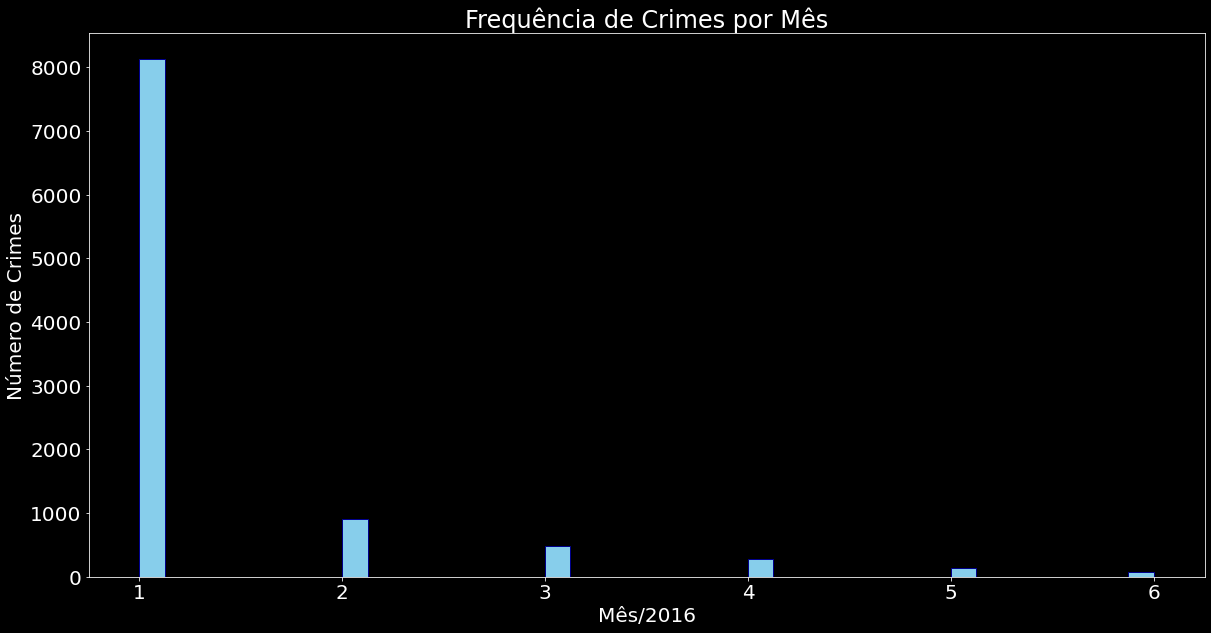

In [290]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.hist(mes, bins=40, color = "skyblue", ec="darkblue")
plt.title('Frequência de Crimes por Mês')
plt.ylabel('Número de Crimes')
plt.xlabel('Mês/2016')
plt.rcParams.update({'font.size': 20})
plt.show()

In [291]:
data2['RUBRICA'].value_counts()

Roubo (art. 157)                                                     3494
Lesao corporal (art. 129)                                            1310
Drogas sem autorizacao ou em desacordo (Art.33 caput)                1175
Furto (art. 155)                                                     1003
Furto qualificado (art. 155 4o.)                                      607
Lesao corporal culposa na direcao de veiculo automotor (Art. 303)     596
A.I.-Drogas sem autorizacao ou em desacordo (Art.33 caput)            519
Lesao corporal (art 129_9)                                            477
Homicidio simples (art. 121)                                          271
A.I.-Roubo (art. 157)                                                 136
Estupro de vulneravel (art.217-A)                                      98
Homicidio qualificado (art. 121 2o.)                                   96
Estupro (art.213)                                                      50
Lesao corporal culposa (art. 129. 6o.)

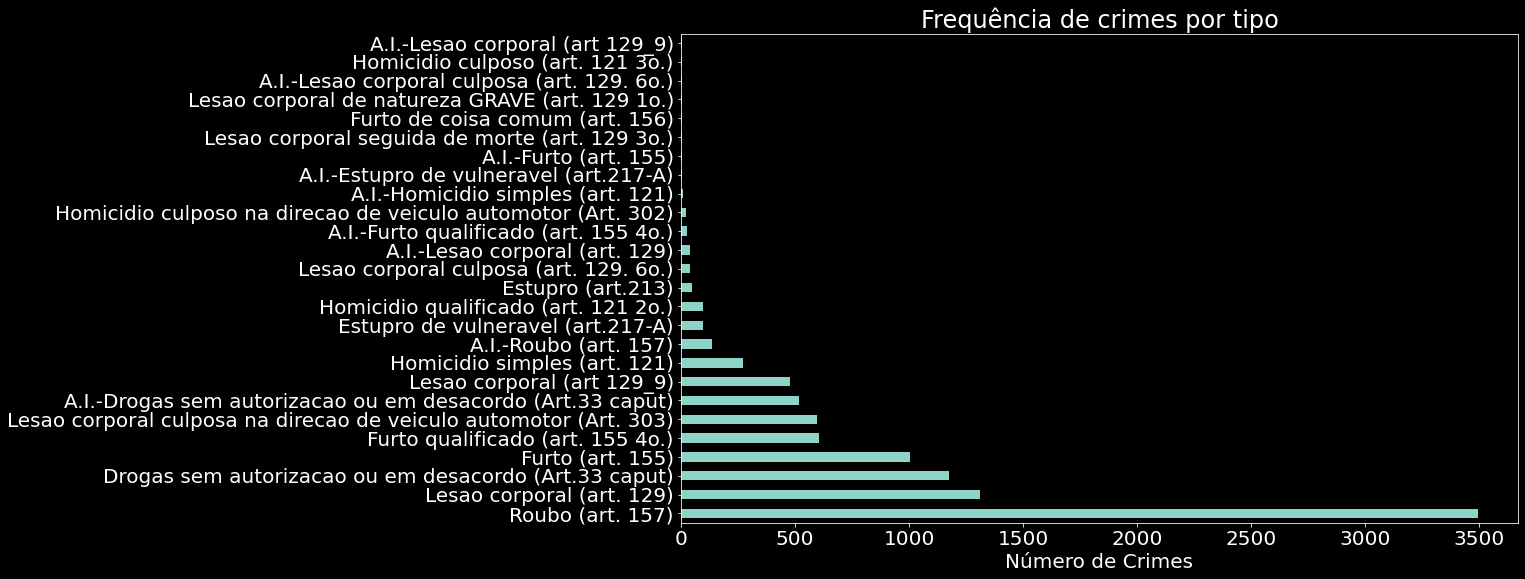

In [292]:
plt.style.use('dark_background')
plt.figure(figsize=(15,9))
plt.xlabel('Número de Crimes')
data2['RUBRICA'].value_counts().plot(kind='barh', title='Frequência de crimes por tipo')
plt.show()


In [293]:
# novas_colunas = pd.get_dummies(data2['RUBRICA']) 
# data3 = pd.concat([data2,novas_colunas], axis=1) 
# data3.head(2)

In [294]:
import os
import folium
import pandas as pd
print(folium.__version__)

0.8.3


In [295]:
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-4fs5lcg1
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-4fs5lcg1
  Created wheel for folium: filename=folium-0.0.0-py2.py3-none-any.whl size=94062 sha256=e2698532bc629f5b115af9cedb3a95cff276334d22de239f5816b300163a0fc9
  Stored in directory: /tmp/pip-ephem-wheel-cache-v8kfo3ke/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium


In [296]:
# !pip install folium

In [297]:
# from folium import plugins

# mapa = folium.Map(location=[-23.71286115, -46.78186771],tiles='Stamen Toner',zoom_start=12)
# coordenadas = []

# lat = data2['LATITUDE'][:1000].values
# long = data2['LONGITUDE'][:1000].values

# for la,lo in zip(lat,long):
#   coordenadas.append([la,lo])

# mapa.add_child(plugins.HeatMap(coordenadas))
# mapa

ImportError: ignored